In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

### Import stock data of TATA Motors

In [2]:
symbol = 'TATAMOTORS.NS'
start = '2020-01-01'
end = '2021-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,185.149994,186.699997,183.600006,184.449997,184.449997,25968357
2020-01-02,185.000000,194.699997,184.600006,193.750000,193.750000,57289863
2020-01-03,192.899994,195.649994,189.250000,191.100006,191.100006,47572728
2020-01-06,191.000000,191.000000,185.050003,185.649994,185.649994,28621212
2020-01-07,187.000000,189.399994,182.300003,184.699997,184.699997,34995035


In [3]:
n = 14 # Number of period
change = df['Adj Close'].diff(1) 
df['Gain'] = change.mask(change<0,0) 
df['Loss'] = abs(change.mask(change>0,0))
df['AVG_Gain'] = df.Gain.rolling(n).mean()
df['AVG_Loss'] = df.Loss.rolling(n).mean()
df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['RSI'] = 100 - (100/(1+df['RS']))

In [4]:
# direct from lib function
#df['rsi'] = ta.RSI(df['Close'],14)

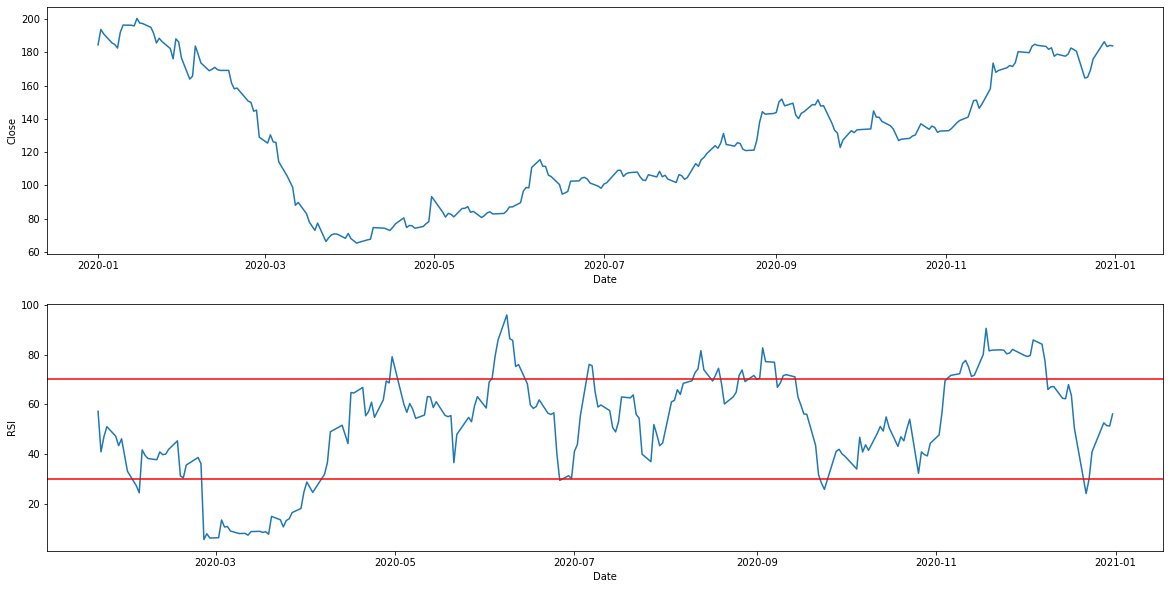

In [5]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Close'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'])
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.axhline(y = 70 , color='red')
ax2.axhline(y = 30, color='red')

fig.show()